# Centroid Model: K-means Clustering

K-means clustering clustering is an iterative process where the similarity of the data points are based on the distance to the centroid of the clusters in one or multidimensional space. The algorithm partitions the data into K clusters where a data point in only in one cluster. The aim is to collect as similar as possible data points in one cluster while keeping the cluster as farther as possible. Algorithm does this by making sure that the sum of the squared distance between the datapoints and the cluster’s centroid is minimum by minimizing the function known as squared error function:

<img src="figs/1_Hd9uKMe7Hn1zJgM6qaZ4iw.webp">

where:

$abs(x_i — v_j)^2$ = Euclidean distance between two pints $x_i$ and $v_j$

$c_i$ = number of data points in cluster i

k = number of centroids

To sum up the process of the algorithm:

1. Initialize K cluster centroids: Select K data points by random sampling without replacement
Calculate the centroid of the clusters:

2. Calculate the centroid of the clusters:

$$ v_i = \sum_{j=1}^k\dfrac{x_j}{c_i}$$

3. Calculate the sum of the squared distances between the data points and all cluster centroids

4. Relocate the data points to the closest centroid

5. Recalculate the centroid of the clusters which were changed

6. Continue step 3–5 until no further changes in the clusters occur

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
data = iris_data.data

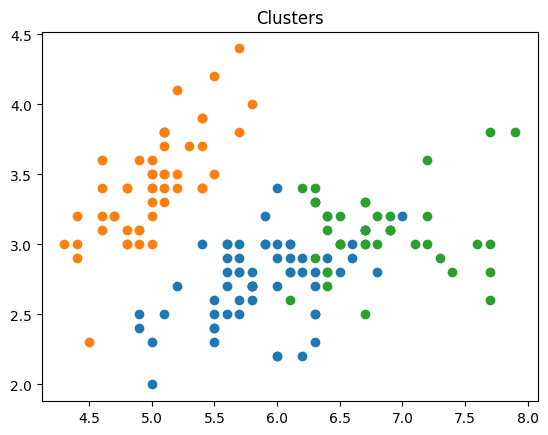

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
clusters = kmeans.fit_predict(data)
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label = 'Type 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 2')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

## Elbow Method: Finding the best K

The elbow method is a good way to find an ideal K value (number of clusters). Unlike hierarchical clustering, this is an important point because we have to define a good number of clusters to obtain good results with K-Means clustering where we need a predefined K value.

Elbow method works buy plotting the sum of squared distances with respect to the numbers of clusters (K). The ideal K numbers would be where the curve starts to flatten out (where it forms an elbow).

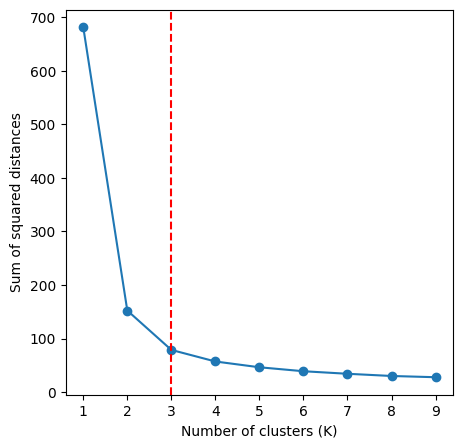

In [5]:
k_values = list(range(1, 10)) # define the range of K values that we want to examine
sum_sq_dist = []
for k in k_values:
    k_m = KMeans(n_clusters=k, n_init=10)
    k_m.fit(data)
    sum_sq_dist.append(k_m.inertia_) # inertia_: Sum of squared distances of samples to their closest cluster center
# Plot sum squared distances with respect to K
plt.figure(figsize=(5, 5))
plt.plot(k_values, sum_sq_dist, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances')
plt.axvline(x=3, c='r', linestyle='--')

The elbow method also confirms that 3 clusters would be an ideal number. If we did not have a hint about the logical number of clusters from the iris dataset, using the elbow method would be a good idea to determine the ideal number of clusters.

## References

[What is Clustering in Machine Learning](https://python.plainenglish.io/lets-talk-about-clustering-in-machine-learning-13a78ac025e3)